#**Analisis Penjualan Ritel dan Segmentasi Pelanggan** 🛒

#Dataset

Dataset `Retail Sales` merupakan data penjualan ritel dan demografi penjualan. Dataset ini mencakup detail penting seperti ID Transaksi, Tanggal, ID Pelanggan, Jenis Kelamin, Usia, Kategori Produk, Kuantitas, Harga per Unit, dan Jumlah Total. Project ini melakukan Exploratory Data Analysis (EDA) dan Analisis RFM (Recency, Frequency, Monetary) untuk memperoleh wawasan, meningkatkan segmentasi pelanggan, dan menjawab pertanyaan bisnis yang telah diperoleh dengan proses analisis.

# Atribut

* Transaction ID: Kode unik untuk setiap transaksi, digunakan untuk pelacakan dan referensi
* Date: Tanggal transaksi, memberikan wawasan dari waktu ke waktu
* Customer ID: Kode unik untuk setiap pelanggan
* Gender: Jenis kelamin pelanggan (Male/Female), memberikan wawasan tentang pola pembelian berdasarkan Jenis kelamin
* Age: Usia pelanggan
* Product Category: Kategori produk yang dibeli pelanggan, untuk membantu memahami preferensi produk
* Quantity: Jumlah unit produk yang dibeli pelanggan
* Price per Unit: Harga per satuan unit produk
* Total Amount: Nilai moneter total dari transaksi, yang menunjukkan dampak keuangan dari setiap pembelian.

# Exploratory Data Analysis (EDA)
Digunakan untuk mengetahui pola, tren, dan hubungan dalam data.

Tujuan:
* Mengeksplorasi kinerja penjualan produk dari waktu ke waktu (misalnya, tren pendapatan bulanan, efek musiman).
* Menganalisis demografi pelanggan (misalnya, distribusi jenis kelamin, pola berdasarkan usia).
* Mengidentifikasi kategori produk dengan penjualan terbanyak dan dampaknya terhadap pendapatan.
* Memvisualisasikan hubungan antara atribut (misalnya, usia vs. pengeluaran, kategori produk vs. jenis kelamin).

# Analisis RFM
Analisis RFM (Recency, Frequency, Monetary) dilakukan dengan mengkategorikan pelanggan berdasarkan perilaku pembelian mereka, sehingga memungkinkan strategi yang ditargetkan untuk retensi dan keterlibatan.

Analisis RFM adalah metode untuk mengelompokkan pelanggan berdasarkan:

1. Recency (R): Seberapa baru pelanggan terakhir kali melakukan pembelian.

2. Frequency (F): Seberapa sering pelanggan melakukan pembelian dalam periode tertentu.

3. Monetary (M): Seberapa besar uang yang dibelanjakan pelanggan.

Tujuan RFM:
1. Segmentasi Pelanggan\
Penilaian RFM digunakan untuk mengelompokkan pelanggan ke dalam segmen yang dapat ditindaklanjuti (Champions, Loyal Customers, At-Risk).
2. Mengidentifikasi pelanggan bernilai tinggi\
Menentukan kelompok pelanggan yang dapat mendorong profitabilitas dan loyalitas.
3. Menganalisis risiko churn\
Memahami karakteristik pelanggan yang menunjukkan penurunan keterlibatan dan bagaimana strategi yang dapat melibatkan mereka kembali.
4. Kampanye pemasaran bertarget\
Memberikan rekomendasi untuk upaya pemasaran yang dipersonalisasi berdasarkan segmentasi pelanggan.

# Pertanyaan Bisnis
EDA
1. Bagaimana demografi pelanggan (usia, jenis kelamin) memengaruhi pengeluaran dan preferensi produk?
2. Apa saja periode puncak penjualan, dan bagaimana hubungannya dengan tren musiman?
3. Kategori produk mana yang paling menarik bagi pelanggan?
4. Kategori produk mana yang memberikan kontribusi terbesar terhadap pendapatan?
5. Informasi apa yang dapat diperoleh dari distribusi harga produk dalam setiap kategori?
6. Apakah ada pola yang dapat dilihat dalam ukuran transaksi (misalnya, jumlah rata-rata, jumlah total)?

RFM
1. Berapa proporsi pelanggan yang bernilai tinggi (Champions, Loyal Customers, At-Risk)?
2. Bagaimana dapat melibatkan kembali pelanggan yang berisiko atau hibernasi?
3. Segmen RFM mana yang memberikan kontribusi paling besar terhadap pendapatan secara keseluruhan?
4. Bagaimana segmen RFM berbeda dalam hal demografi dan preferensi produk?

# Import Library ⚙️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Data Loading 📑

In [2]:
# Memuat dataset (dataset berada pada Github)
df=pd.read_csv('https://raw.githubusercontent.com/Arfi3/Analisis-Penjualan-Ritel-dan-Segmentasi-Pelanggan/refs/heads/main/retail_sales_dataset.csv')

In [3]:
# Menampilkan 5 baris teratas pada dataset
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Understanding Dataset 📊

In [4]:
# Mengetahui bentuk dan kolom Dataset
print("Bentuk Dataset:")
print(f"Baris: {df.shape[0]}, Kolom: {df.shape[1]}")
print("\nNama Kolom:")
print(df.columns.tolist())

Bentuk Dataset:
Baris: 1000, Kolom: 9

Nama Kolom:
['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [5]:
# Menampilkan informasi yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# Menampilkan ringkasan statistik
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Penjelasan 📝
Dataset terdiri dari 1000 baris dan 9 kolom, dengan kolom bertipe numerik yaitu `Transaction ID`, `Age`, `Quantity`, `Price per Unit`, dan `Total Amount`. Sedangkan kolom bertipe kategorik yaitu `Date`, `Customer ID`, `Gender`, dan `Product Category`.

Berdasarkan deskripsi data:

* Usia rata-rata pelanggan adalah 41,3 tahun.

* Rata-rata jumlah produk yang dibeli per transaksi adalah sekitar 2–3 item.

* Usia pelanggan berkisar antara 18 hingga 64 tahun.

* Jumlah produk yang dibeli per transaksi berkisar antara 1 hingga 4 item.

* Harga per unit berkisar antara 25 hingga 500, dengan harga rata-rata sebesar 179,89.

* Total nilai transaksi berkisar antara 25 hingga 2000, dengan rata-rata 456.

In [7]:
# Mengetahui nilai unik pada masing-masing kolom
print("\nNilai unik per kolom:")
print(df.nunique())


Nilai unik per kolom:
Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


In [8]:
# Mengubah kolom `Date` menjadi tipe Datetime
df['Date'] = pd.to_datetime(df['Date'])
# Memisahkan Kolom Tanggal dan menambah kolom nama hari dan nama bulan
df['Days'] = df['Date'].dt.day_name()
df['MonthDate'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Days,MonthDate,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Friday,24,November,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Monday,27,February,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Friday,13,January,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Sunday,21,May,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Saturday,6,May,2023


In [9]:
# Mengelompokkan usia berdasarkan kategori usia (muda, tua, senior)
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Muda', 'Dewasa', 'Lansia'])
# Menghitung keuntungan penjualan per unit produk
df['Revenue per Item'] = df['Total Amount'] / df['Quantity']
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Days,MonthDate,Month,Year,Age Group,Revenue per Item
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Friday,24,November,2023,Dewasa,50.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Monday,27,February,2023,Muda,500.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Friday,13,January,2023,Dewasa,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Sunday,21,May,2023,Dewasa,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Saturday,6,May,2023,Muda,50.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Days              1000 non-null   object        
 10  MonthDate         1000 non-null   int32         
 11  Month             1000 non-null   object        
 12  Year              1000 non-null   int32         
 13  Age Group         1000 non-null   category      
 14  Revenue per Item  1000 no

# Data Preprocessing 🛠️

In [11]:
# Mengetahui jumlah nilai yang hilang pada dataset
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0
Days,0


In [12]:
# Mengetahui jumlah nilai yang terduplikat pada dataset
df.duplicated().sum()

np.int64(0)

In [13]:
# Menangani nilai yang hilang
print("\n🔧 Menangani Nilai yang Hilang:")

# Menghapus baris atau kolom dengan nilai hilang yang terlalu banyak
threshold = 0.5  # Menghapus kolom dengan nilai yang hilang lebih dari 50%
missing_percentage = df.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > threshold].index
print(f"\nKolom yang dihapus (lebih dari {threshold*100}% nilai yang hilang): {cols_to_drop.tolist()}")
df.drop(columns=cols_to_drop, inplace=True)

# Melakukan imputasi data yang hilang untuk kolom numerik dan kategorik
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)  # Kolom data numerik diisi dengan median
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Kolom data kategorik diisi dengan modus

print("Penanganan nilai yang hilang berhasil.")


🔧 Menangani Nilai yang Hilang:

Kolom yang dihapus (lebih dari 50.0% nilai yang hilang): []
Penanganan nilai yang hilang berhasil.


<ipython-input-13-633529235a9b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Kolom data numerik diisi dengan median
<ipython-input-13-633529235a9b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [14]:
# Menghapus baris yang terduplikat
print("\n🔧 Menghapus Baris yang Terduplikat:")
duplicates = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplikat terhapus.")


🔧 Menghapus Baris yang Terduplikat:

Jumlah baris duplikat: 0


In [15]:
# Mengelompokkan kolom yang ber type data numerik
numerical_data = df.select_dtypes(exclude=['object','category']).columns
print("\nKolom Numerik:")
print(numerical_data.tolist())


Kolom Numerik:
['Transaction ID', 'Date', 'Age', 'Quantity', 'Price per Unit', 'Total Amount', 'MonthDate', 'Year', 'Revenue per Item']


In [16]:
# Mengelompokkan kolom yang ber type data kategorik
categorical_data = df.select_dtypes(include=['object','category']).columns
print("\nKolom Kategorik:")
print(categorical_data.tolist())


Kolom Kategorik:
['Customer ID', 'Gender', 'Product Category', 'Days', 'Month', 'Age Group']


In [17]:
# 🔍 Memeriksa transaksi maksimum per pelanggan untuk data sekarang
print(f"Transaksi maksimum per pelanggan (sebelum dimodifikasi): {df['Customer ID'].value_counts().max()}")

Transaksi maksimum per pelanggan (sebelum dimodifikasi): 1


In [18]:
# 🔍 Membuat Ulang Kolom Customer ID

# Tambahkan skenario pembelian ganda (lebih dari satu kali pembelian oleh pelanggan yang sama) dengan membuat kolom customer_id baru.
np.random.seed(105)  # Untuk reproduktifitas
df['customer_id_new'] = np.random.randint(0, 500, size=len(df))

# Tampilkan jumlah nilai untuk Customer ID yang baru
print("\nDistribusi Customer ID (ID baru):")
print(df['customer_id_new'].value_counts())

print("\n✔️ Kolom baru customer_id berhasil dibuat!")
print(df[['customer_id_new']].head())


Distribusi Customer ID (ID baru):
customer_id_new
278    7
477    7
437    6
17     6
285    6
      ..
150    1
295    1
89     1
13     1
208    1
Name: count, Length: 434, dtype: int64

✔️ Kolom baru customer_id berhasil dibuat!
   customer_id_new
0              192
1              117
2              278
3               73
4              228


In [19]:
# 🔍 Membuat format Customer Id baru

# Format kolom customer_id baru yang terlihat seperti 'CUST001', 'CUST002', dst.
df['customer_id_new'] = df['customer_id_new'].apply(lambda x: f'CUST{str(x).zfill(3)}')

# Ganti kolom customer_id yang asli dengan kolom format yang baru
df['Customer ID'] = df['customer_id_new']

print("\n✔️ Kolom Customer ID berhasil diganti!")
print(df[['Customer ID']].head())


✔️ Kolom Customer ID berhasil diganti!
  Customer ID
0     CUST192
1     CUST117
2     CUST278
3     CUST073
4     CUST228


In [20]:
# 🔍 Menghapus kolom sementara

# Menghapus kolom sementara custemer_id_new
df = df.drop(columns=['customer_id_new'])

# Verifikasi bahwa update kolom berhasil
print("\n✔️ Penghapusan kolom sementara `customer_id_new` berhasil!")
print(df['Customer ID'].value_counts().head())


✔️ Penghapusan kolom sementara `customer_id_new` berhasil!
Customer ID
CUST278    7
CUST477    7
CUST437    6
CUST017    6
CUST285    6
Name: count, dtype: int64


In [21]:
# Menangani Outlier
# Mengidentifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom Numerik: ", list(numerical_columns))

Kolom Numerik:  ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Revenue per Item']


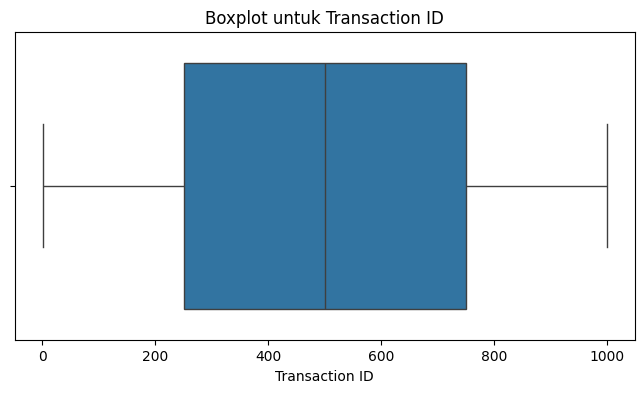

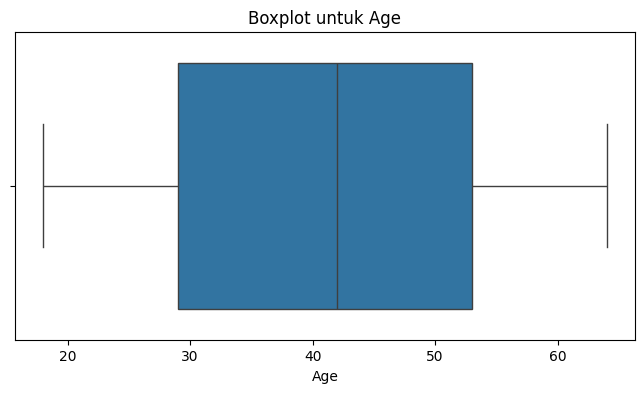

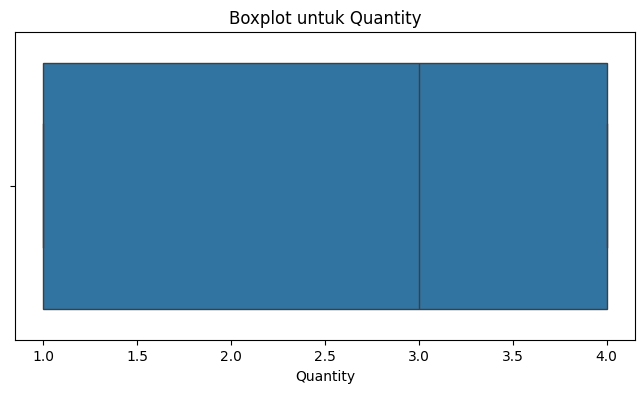

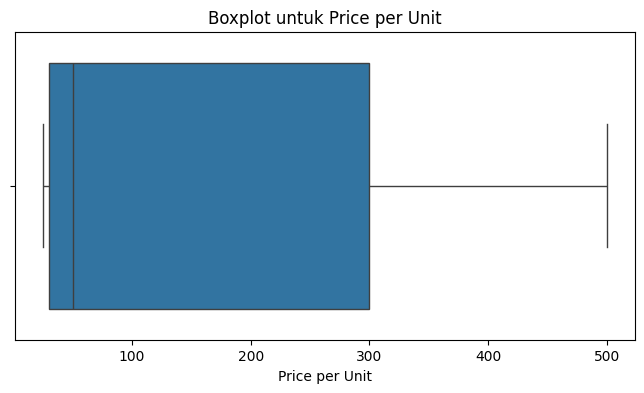

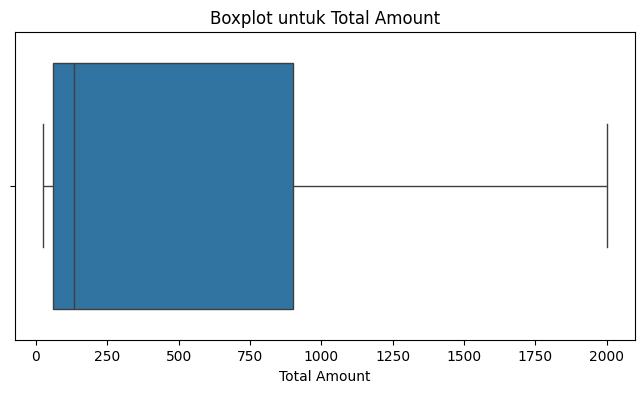

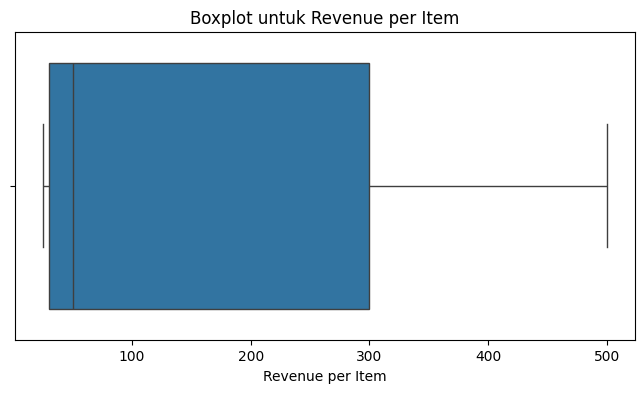

In [22]:
# Visualisasi kolom numerik dengan bloxpot
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot untuk {col}")
    plt.xlabel(col)
    plt.show()

In [23]:
# Mendeteksi outlier menggunakan IQR (Interquatile Range)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil kedua
    IQR = Q3 - Q1               # Rentang Interquartile

    # Mendefinisikan batas minimum dan maksimum untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n🚩 Outlier terdeteksi di {col}: {outliers.shape[0]}")

    # Menghapus outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


🚩 Outlier terdeteksi di Transaction ID: 0

🚩 Outlier terdeteksi di Age: 0

🚩 Outlier terdeteksi di Quantity: 0

🚩 Outlier terdeteksi di Price per Unit: 0

🚩 Outlier terdeteksi di Total Amount: 0

🚩 Outlier terdeteksi di Revenue per Item: 0


In [24]:
# Konfirmasi bentuk data setelah dilakukan penanganan outlier
print("\n✅ Bentuk data setelah dilakukan penanganan outlier: ", df.shape)


✅ Bentuk data setelah dilakukan penanganan outlier:  (1000, 15)


## Penjelasan 📝
Dari plot dapat diketahui bahwa tidak terdapat outlier pada masing-masing variabel.

# Exploratory Data Analysis (EDA)🔍

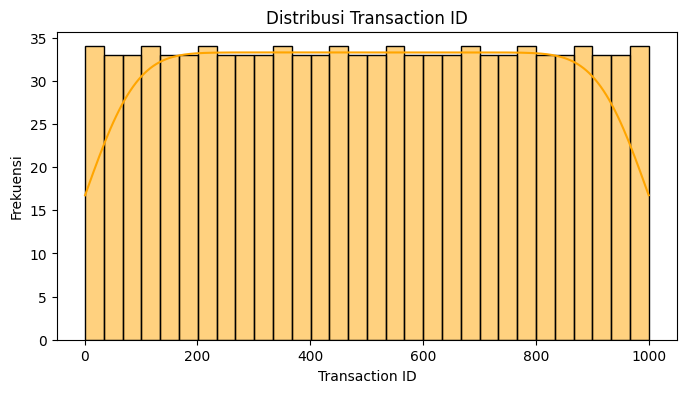

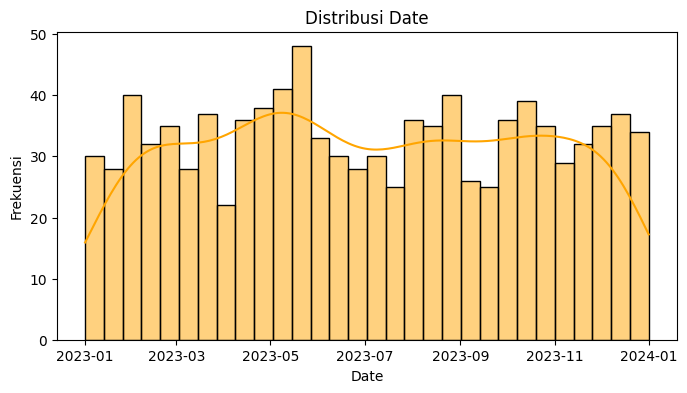

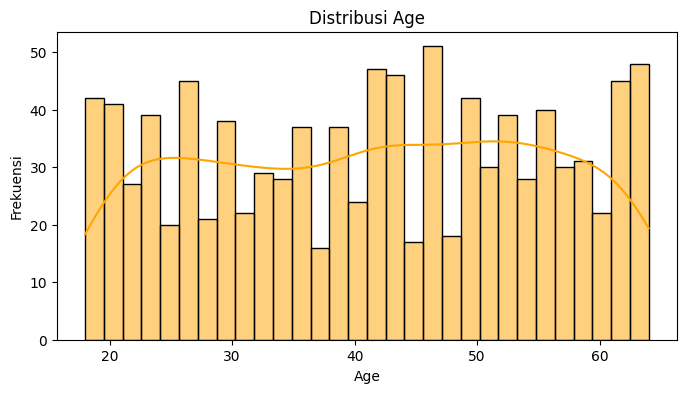

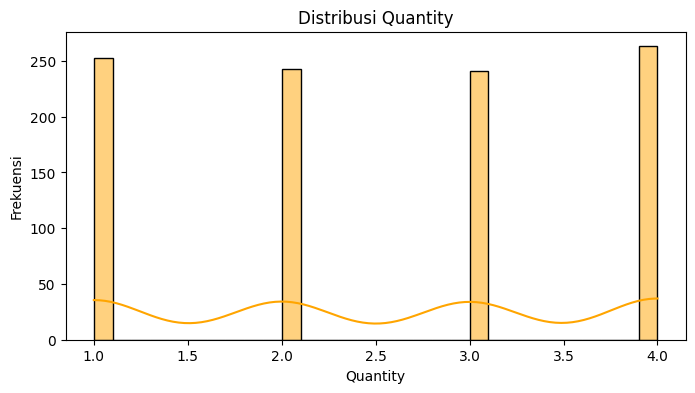

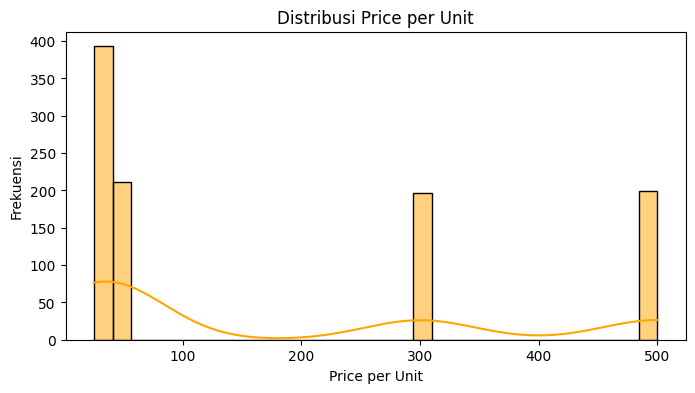

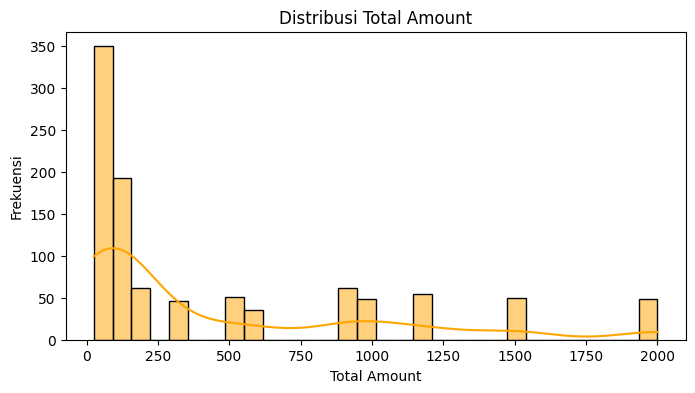

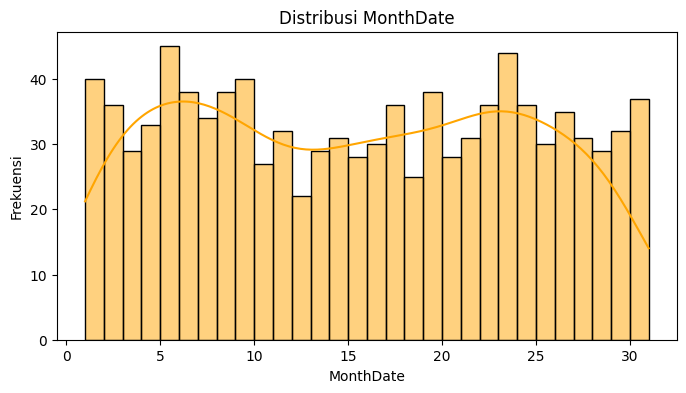

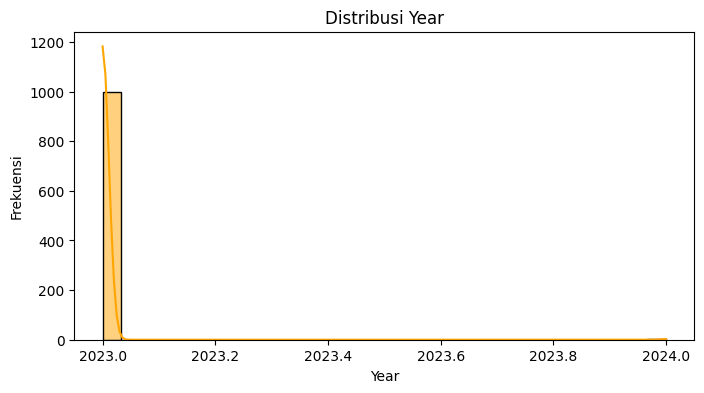

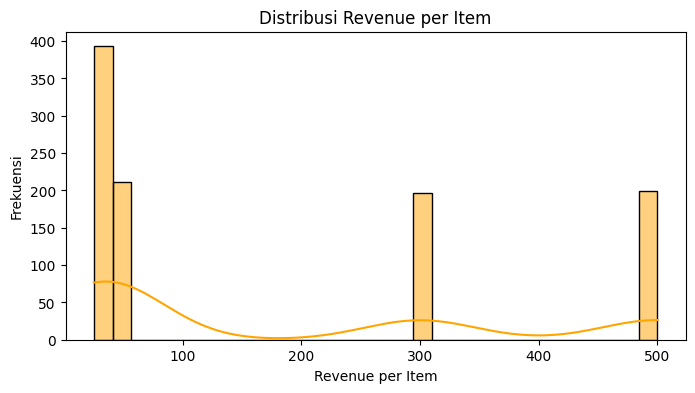

In [25]:
# Menampilkan visualisasi data numerik
for col in numerical_data:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

## Penjelasan 📝
**Pada Plot Distribusi Transaksi ID  diperoleh:**
* Setiap rentang Transaction ID memiliki jumlah frekuensi yang serupa, sekitar 33–35 transaksi per rentang ID tertentu.
* Ini menunjukkan bahwa data transaksi terdistribusi secara acak dan seragam, tanpa adanya konsentrasi atau cluster pada ID tertentu.


**Pada Plot Distribusi Date:**
* Distribusi transaksi cukup merata sepanjang tahun, namun terjadi peningkatan signifikan pada bulan Mei 2023 dan terdapat penurunan transaksi yang terlihat pada Juli dan Agustus 2023.
* Pola ini bisa mengindikasikan adanya pengaruh oleh waktu maupun musim.
* Distribusi tidak simetris sempurna, tetapi cukup seimbang tanpa outlier ekstrem.


**Pada Plot Distribusi Age:**\
Distribusi cukup merata pada rentang usia, dengan sedikit variasi pada beberapa kelompok umur. Meskipun distribusi tidak simetris sempurna tetapi cukup seimbang tanpa outlier.


**Pada Plot Distribusi Quantity:**\
Kuantitas produk yang dibeli pelanggan terbatas hanya pada angka 1 hingga 4 unit per transaksi. Distribusinya cukup seragam, dengan frekuensi pembelian yang hampir seimbang di setiap jumlah kuantitas. Hal ini mengindikasikan bahwa pelanggan memiliki kebiasaan belanja yang serupa dalam hal jumlah produk yang dibeli.


**Pada Plot Distribusi Price per Unit:**\
Harga produk per unit hanya terbatas pada nilai tertentu seperti 25,50,300, dan 500. Sebagian besar transaksi terjadi pada produk dengan harga lebih rendah (25 dan 50), menunjukkan bahwa barang dengan harga ekonomis lebih sering dibeli oleh pelanggan. Distribusi ini bersifat diskret, bukan menyebar merata, yang mengindikasikan bahwa jenis produk dalam dataset ini memiliki rentang harga tetap atau kategori harga tertentu.


**Pada Plot Distribusi Total Amount:**\
Distribusi Total Amount menunjukkan bahwa mayoritas pelanggan melakukan pembelian dengan total nilai transaksi yang relatif kecil. Hanya sebagian kecil pelanggan yang melakukan pembelian dalam jumlah besar. Pola ini umum dalam penjualan ritel, di mana sebagian besar transaksi bernilai rendah hingga sedang, sedangkan pembelian besar lebih jarang terjadi. Distribusi ini bersifat skewed (miring ke kanan), mencerminkan ketimpangan nilai transaksi.


**Pada Plot Distribusi MonthDate:**\
Distribusi transaksi cukup merata dari hari ke hari dalam sebulan, Distribusi tidak simetris sempurna, tetapi cukup seimbang tanpa outlier ekstrem.


**Pada Plot Distribusi Year:**\
Sebagian besar data transaksi terkonsentrasi pada tahun 2023. Hal ini menunjukkan bahwa data penjualan yang tersedia mayoritas berasal dari periode tersebut. Sementara itu, data untuk tahun 2024 masih sangat terbatas atau belum terkumpul secara signifikan. Oleh karena itu, analisis tren tahunan sebaiknya difokuskan hanya pada tahun 2023, karena tahun 2024 belum mencerminkan pola yang cukup kuat untuk dianalisis.


**Pada Plot Distribusi Revenue per item:**\
Distribusi pada plot Revenue selaras dengan distribusi harga per item, menunjukkan bahwa banyaknya penjualan pada harga yang lebih murah memberikan kontribusi cukup baik untuk keuntungan penjualan.

In [26]:
# Pengaturan tampilan
pd.set_option('display.max_columns', None)  # Menampilkan seluruh kolom

import warnings
warnings.filterwarnings('ignore')  # Sembunyikan peringatan (warnings) agar tampilan output menjadi lebih bersih.

# Menampilkan grafik langsung di dalam sel Jupyter Notebook
%matplotlib inline

# Menentukan dan menggunakan gaya visual (style) yang konsisten untuk semua grafik
sns.set_theme(style="whitegrid")

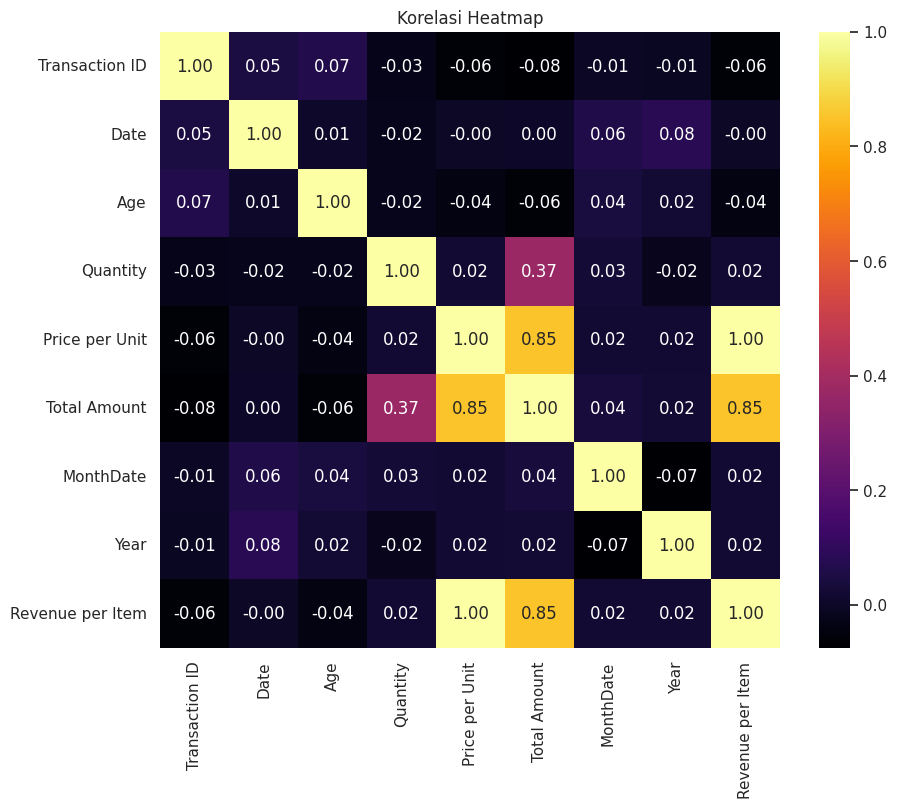

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_data].corr(), annot=True, cmap="inferno", fmt=".2f")
plt.title("Korelasi Heatmap")
plt.show()

## Penjelasan 📝
Variabel yang paling mempengaruhi nilai transaksi (Total Amount) adalah price per Unit dan Quantity.

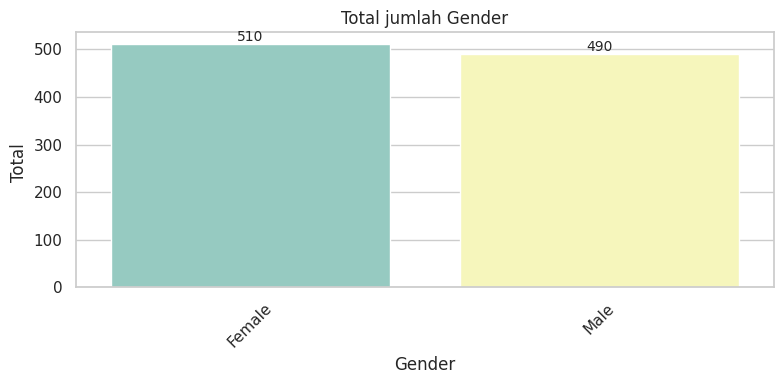

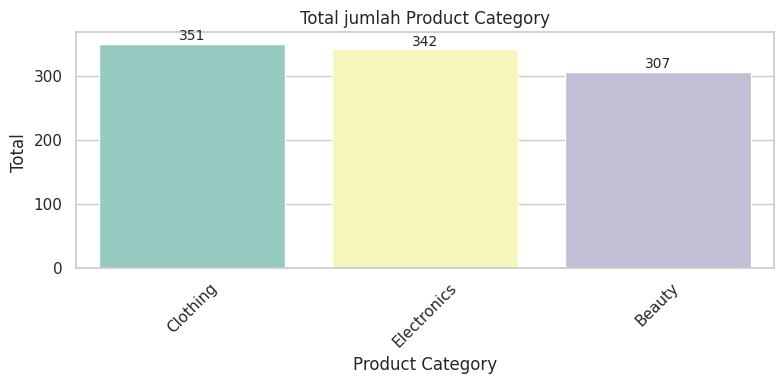

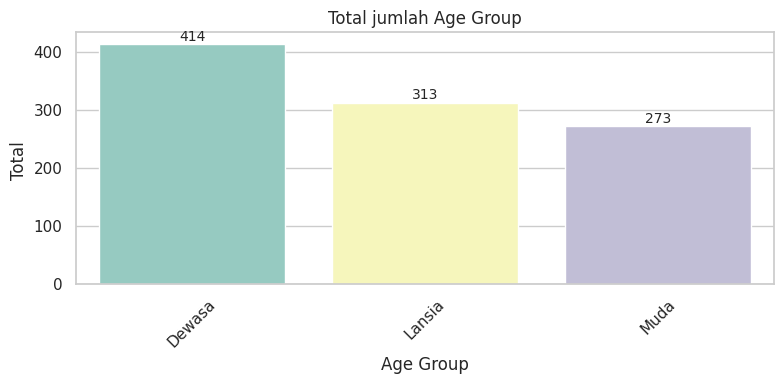

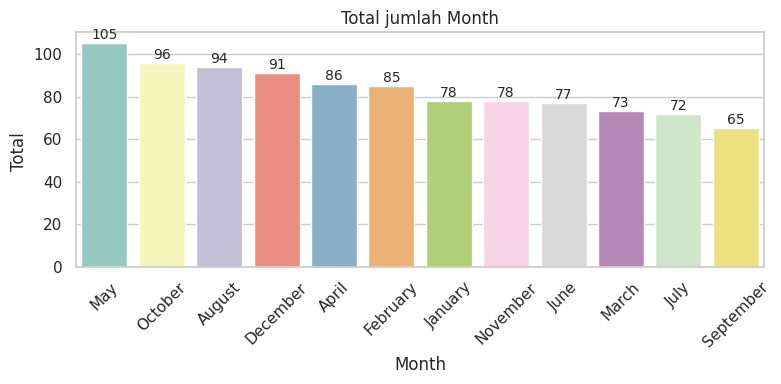

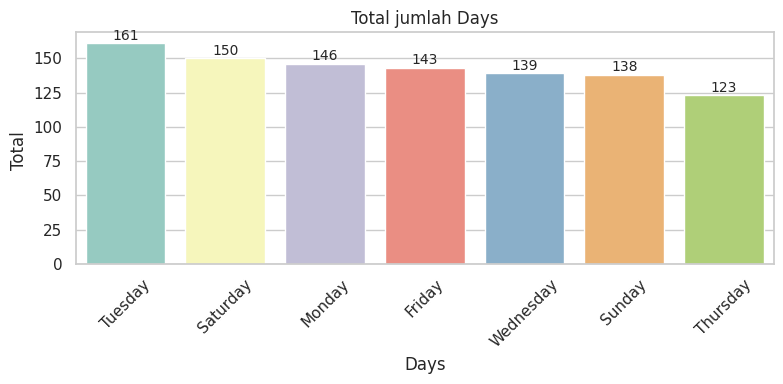

In [28]:
# Mengecualikan kolom `Date` dan `Customer ID` dari kolom kategorik
categorical_data = ['Gender', 'Product Category','Age Group','Month','Days']

# Menampilkan visualisasi data kategorik
for col in categorical_data:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        x=df[col],
        order=df[col].value_counts().index,
        palette='Set3'  # Contoh palet warna
    )

    # Menambahkan nilai count di atas batang
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # posisi X di tengah batang
            height + 0.5,                   # posisi Y sedikit di atas batang
            int(height),                    # nilai yang ditampilkan (jumlah)
            ha='center', va='bottom', fontsize=10
        )

    plt.title(f"Total jumlah {col}")
    plt.xlabel(col)
    plt.ylabel("Total ")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

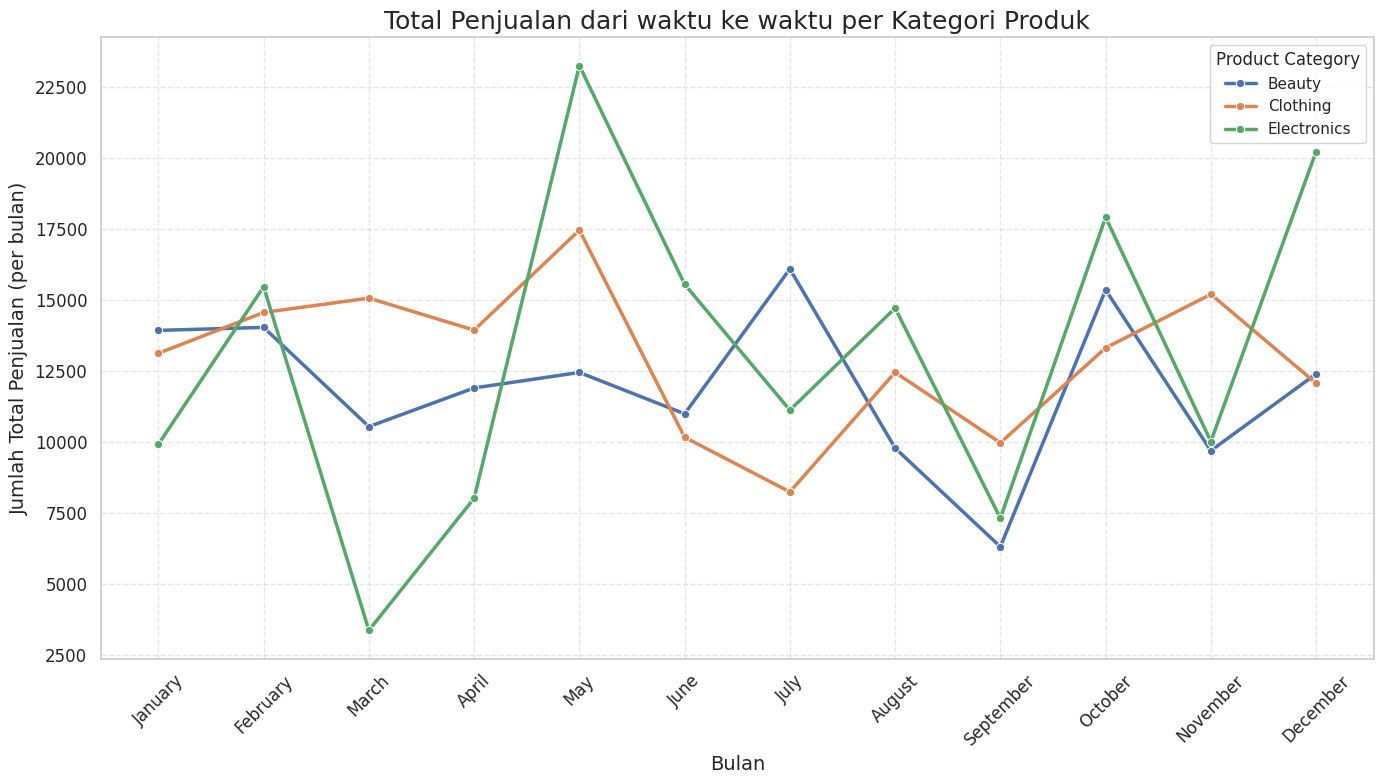

In [29]:
# 🔍 Tren penjualan dari waktu ke waktu


# Memastikan kolom `Month` yang diperlukan memiliki format yang benar
df['Month'] = pd.Categorical(
    df['Month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Agregasi Total penjualan per bulan
monthly_sales = df.groupby(['Month','Product Category'])['Total Amount'].sum().reset_index()

# Visualisasi Penjualan dari waktu ke waktu
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Month',
    y='Total Amount',
    hue='Product Category',
    data=monthly_sales,
    marker='o',
    linewidth=2.5
)
plt.title('Total Penjualan dari waktu ke waktu per Kategori Produk', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Total Penjualan (per bulan)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product Category', loc='upper right')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

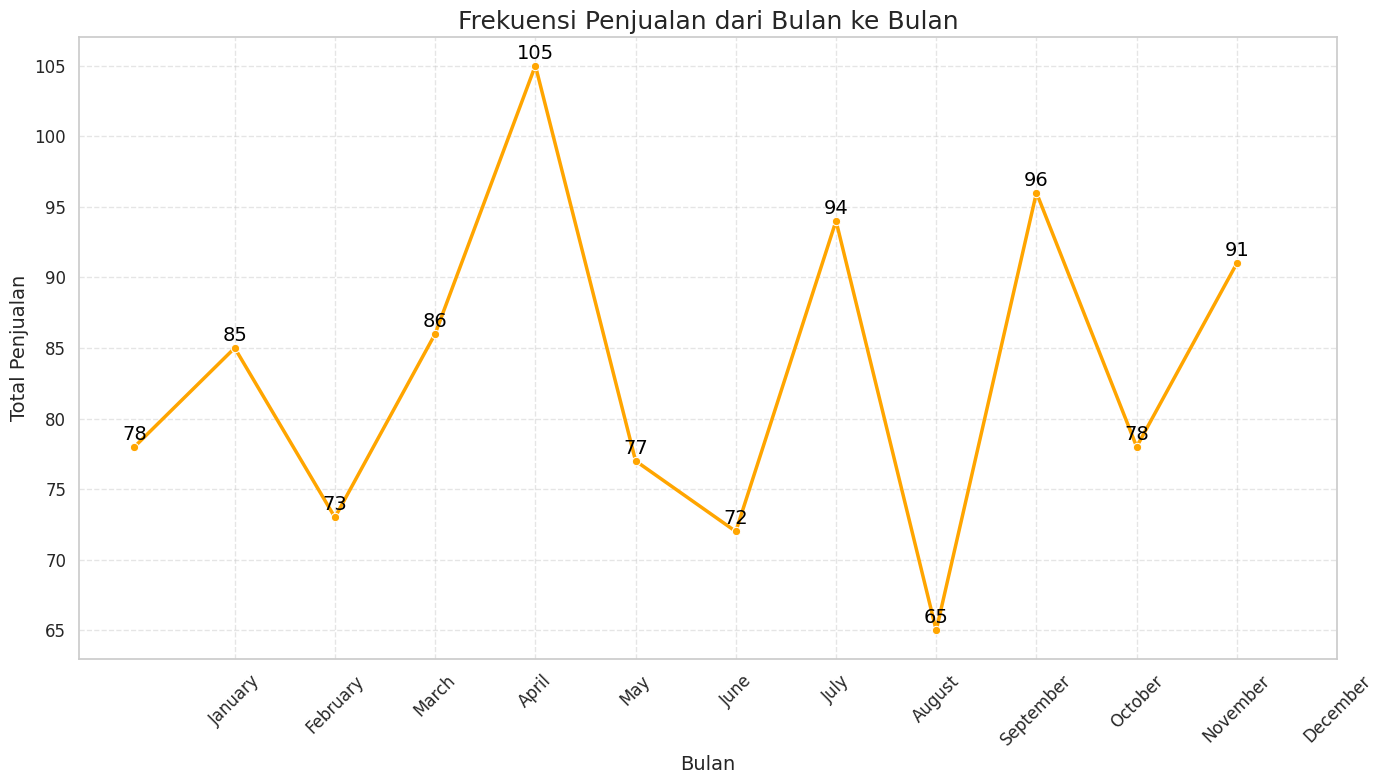

In [30]:
# 🔄 Frekuensi transaksi dari bulan ke bulan

# Grup berdasarkan Bulan dan jumlah total transaksi
transaction_count = df.groupby('Month')['Transaction ID'].count()

# Visualisasi transaksi dari bulan ke bulan
plt.figure(figsize=(14, 8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values, marker='o', linewidth=2.5, color='orange')
plt.title('Frekuensi Penjualan dari Bulan ke Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
for index, value in enumerate(transaction_count.values):
    plt.text(index, value+0.5, str(value), ha='center', fontsize=14, color='black')
plt.tight_layout()
plt.show()

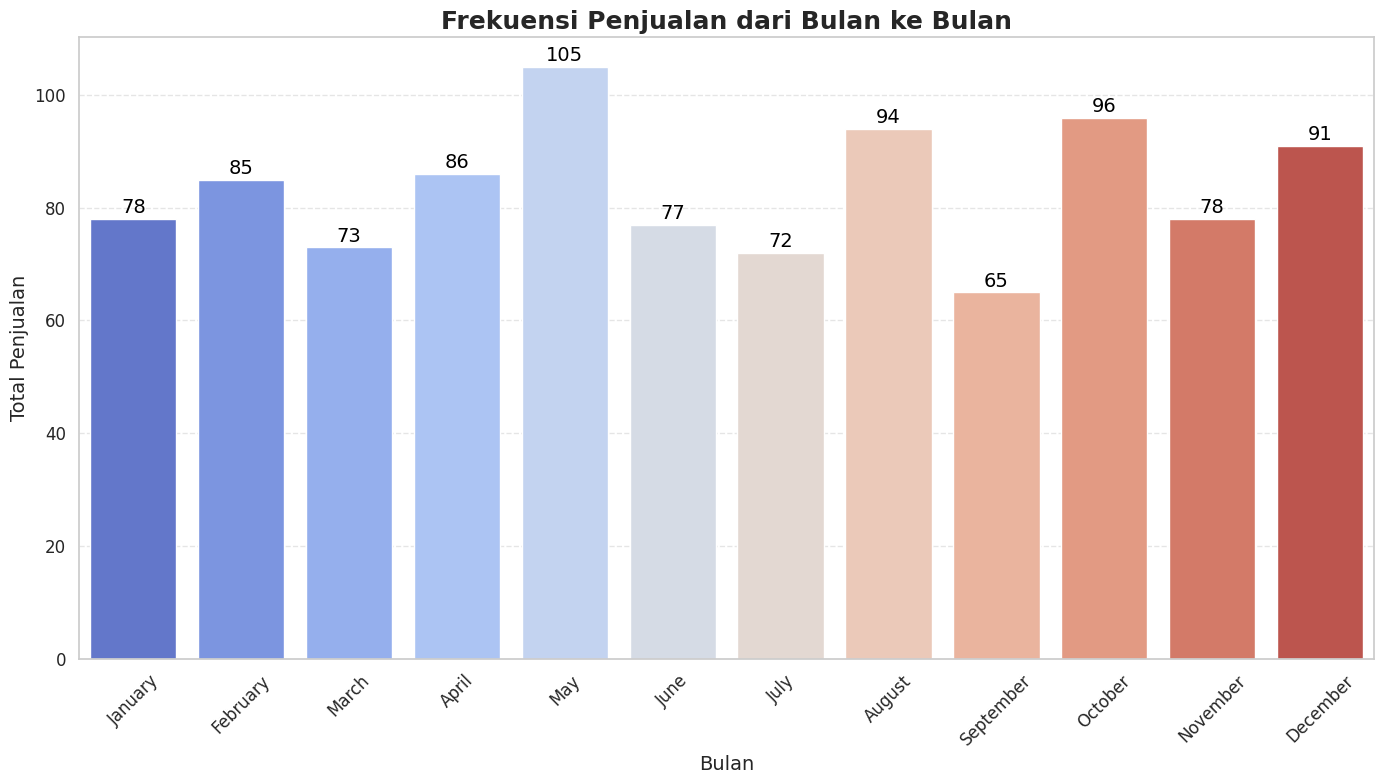

In [31]:
# Plot frekuensi transaksi sebagai bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=transaction_count.index,
    y=transaction_count.values,
    palette='coolwarm'
)

plt.title('Frekuensi Penjualan dari Bulan ke Bulan', fontsize=18, fontweight='bold')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)

plt.xticks(
    ticks=range(12),
    labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    rotation=45, fontsize=12
)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
for index, value in enumerate(transaction_count.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=14, color='black')
plt.tight_layout()
plt.show()

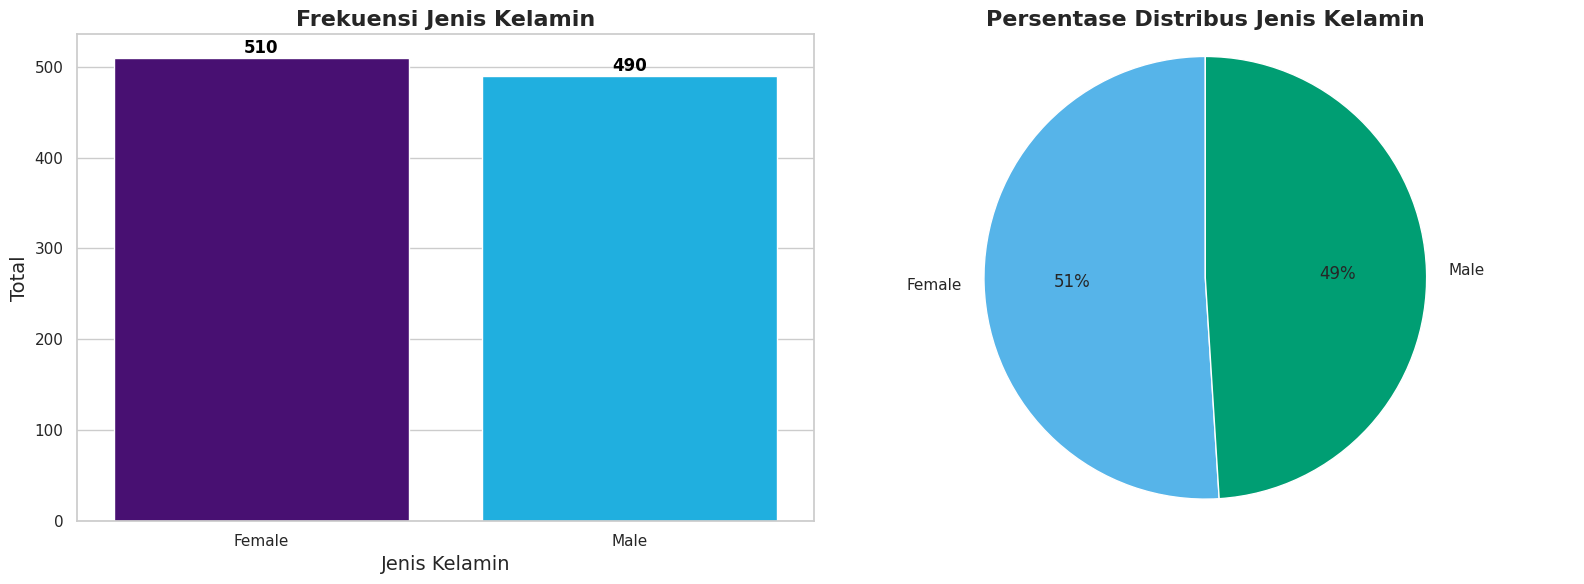

In [32]:
# Total pelanggan berdasarkan jenis kelamin
gender_counts = df['Gender'].value_counts()
# Membuat bar chart
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette=['#4B0082', '#00BFFF'],
    ax=axs[0]
)
axs[0].set_title('Frekuensi Jenis Kelamin', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Jenis Kelamin', fontsize=14)
axs[0].set_ylabel('Total', fontsize=14)

for index, value in enumerate(gender_counts.values):
    axs[0].text(
        x=index,
        y=value + 5,
        s=f"{value}",
        ha='center',
        fontsize=12,
        color='black',
        fontweight='bold'
    )

gender_dist = (gender_counts / gender_counts.sum()) * 100
gender_dist = gender_dist.reset_index()
gender_dist.columns = ['Gender', 'Percentage']

# Membuat pie chart
axs[1].pie(
    gender_dist['Percentage'],
    labels=gender_dist['Gender'],
    autopct='%.0f%%',
    colors=['#56b4e9', '#009e73'],
    startangle=90
)
axs[1].set_title('Persentase Distribus Jenis Kelamin', fontsize=16, fontweight='bold')
axs[1].axis('equal')  # Ensure the pie chart is circular

# --- Adjust Layout ---
plt.tight_layout()
plt.show()

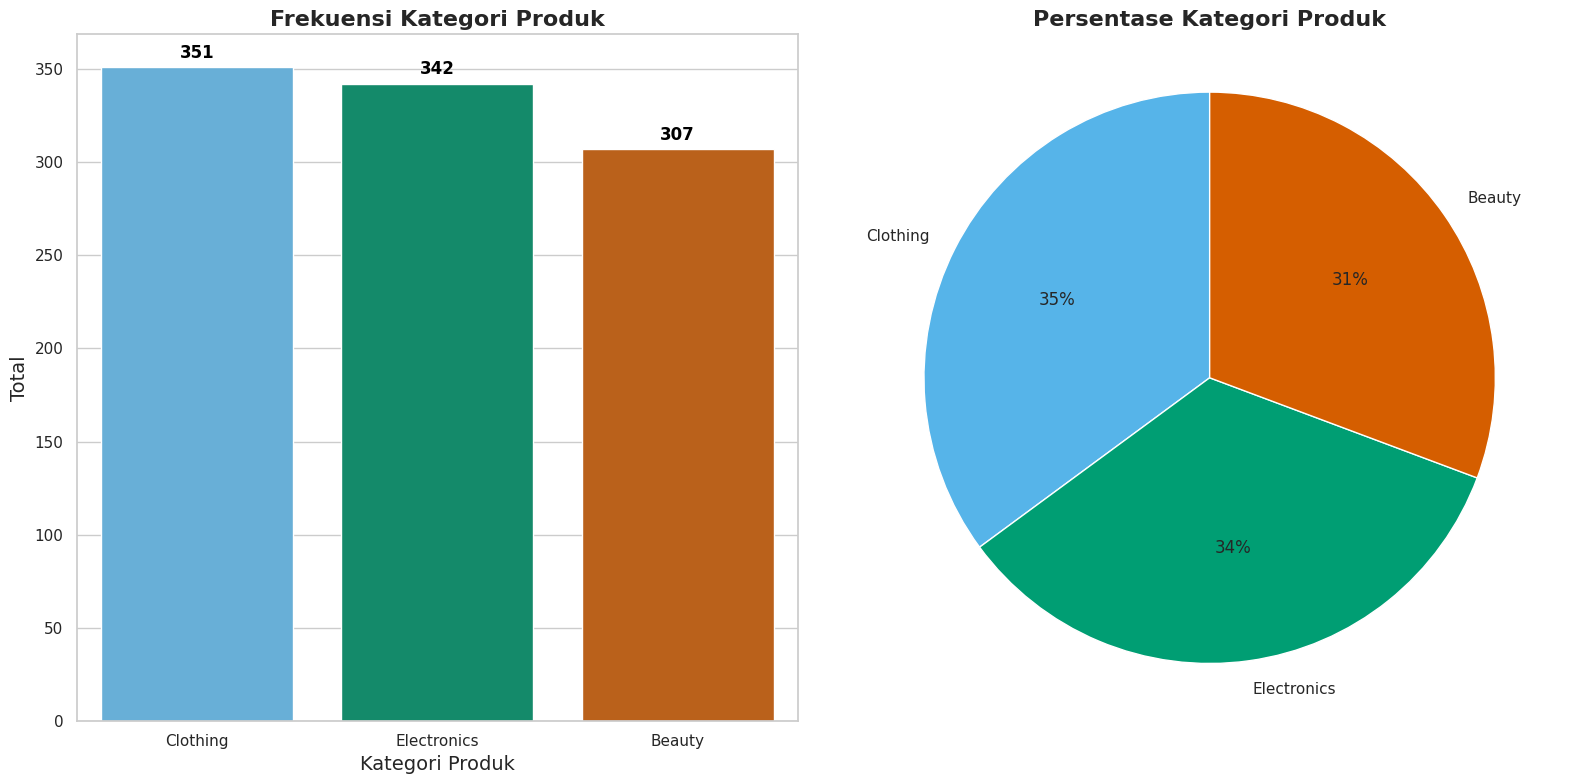

In [33]:
# Visualisasi Total produk terjual berdasarkan kategori produk
cate_counts = df['Product Category'].value_counts()

# Menghitung persentase distribusi kategori produk
cate_dist = (cate_counts / cate_counts.sum()) * 100
cate_dist = cate_dist.reset_index()
cate_dist.columns = ['Product Category', 'Percentage']

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(
    x=cate_counts.index,
    y=cate_counts.values,
    palette=['#56b4e9', '#009e73', '#d55e00'],
    ax=axs[0]
)
axs[0].set_title('Frekuensi Kategori Produk', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Kategori Produk', fontsize=14)
axs[0].set_ylabel('Total', fontsize=14)

for index, value in enumerate(cate_counts.values):
    axs[0].text(
        x=index,
        y=value + 5,
        s=f"{value}",
        ha='center',
        fontsize=12,
        color='black',
        fontweight='bold'
    )

axs[1].pie(
    cate_dist['Percentage'],
    labels=cate_dist['Product Category'],
    autopct='%.0f%%',
    colors=['#56b4e9', '#009e73', '#d55e00'],
    startangle=90
)
axs[1].set_title('Persentase Kategori Produk', fontsize=16, fontweight='bold')
axs[1].axis('equal')


plt.tight_layout()
plt.show()

## Penjelasan 📝
* Tercatat jumlah pelanggan wanita sebanyak 510 dan pria 490, dengan porsi yang cukup seimbang. Sedikit lebih tingginya jumlah pembeli wanita kemungkinan mencerminkan kecenderungan perilaku belanja yang lebih aktif, namun hal ini perlu dikaji lebih lanjut agar tidak menimbulkan asumsi bias.
* Kategori produk yang paling banyak terjual adalah pakaian, diikuti oleh elektronik, dan terakhir produk kecantikan. Penjualan produk kecantikan yang lebih rendah kemungkinan disebabkan oleh segmen pasar yang lebih sempit, yaitu mayoritas wanita.
* Total pembelian berdasarkan kelompok usia dengan pembelian tertinggi adalah dewasa, diikuti lansia, dan terakhir usia muda. Hal ini mungkin dipengaruhi banyaknya kebutuhan dan daya beli kelompok usia dewasa.
* Penjualan tertinggi terjadi pada bulan Mei 2023, bertepatan dengan musim kemarau. Kenaikan ini mungkin dipicu oleh kebutuhan pakaian tertentu seperti pakaian ringan, atau bisa juga karena adanya promosi musiman.
* Hari dengan penjualan tertinggi adalah Selasa, sedangkan yang terendah adalah Kamis. Hal ini bisa menjadi acuan untuk penjadwalan promosi mingguan, misalnya dengan meningkatkan kampanye atau diskon khusus di hari Kamis untuk meratakan performa.

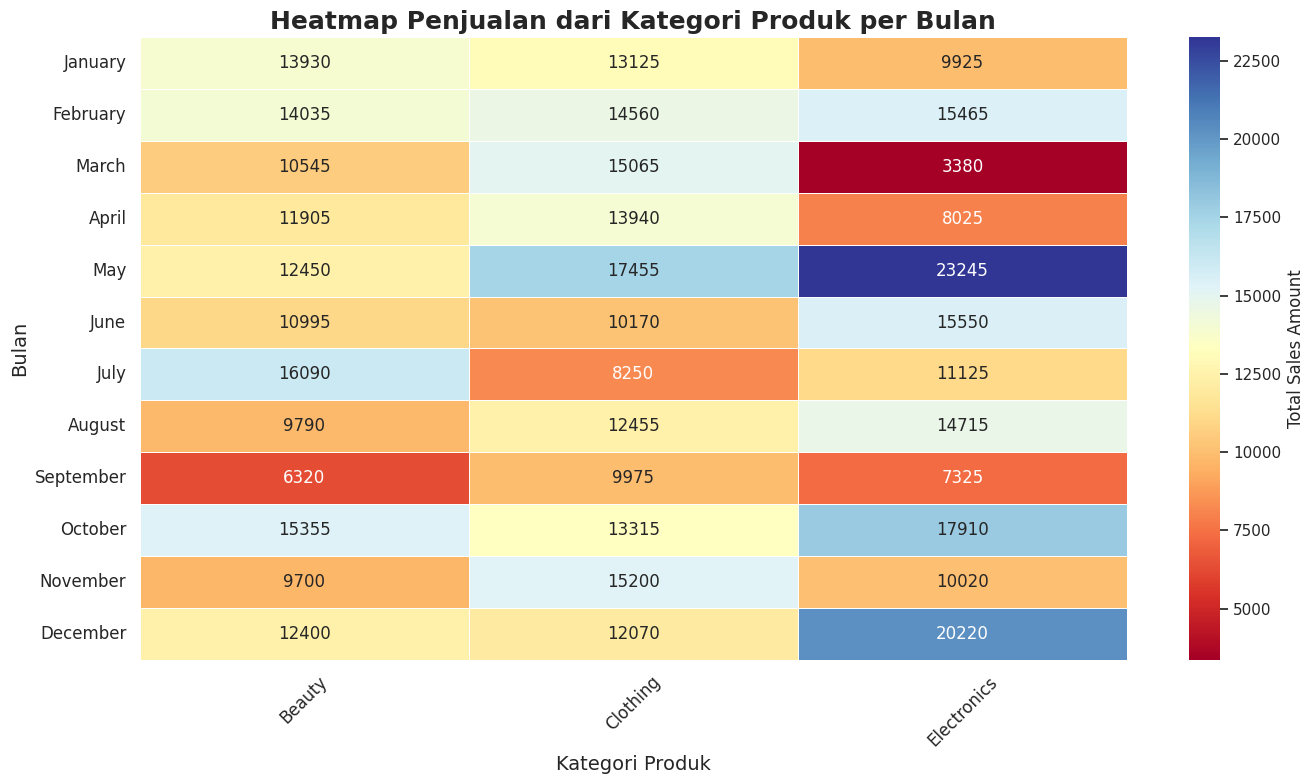

In [34]:
# Buat pivot tabel untuk heatmap
heatmap_data = df.pivot_table(
    index='Month',
    columns='Product Category',
    values='Total Amount',
    aggfunc='sum'
)

# Pastikan bulan diurutkan dengan benar di peta panas
heatmap_data = heatmap_data.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Visualisasi heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='RdYlBu',
    linewidths=0.5,
    cbar_kws={'label': 'Total Sales Amount'}
)
plt.title('Heatmap Penjualan dari Kategori Produk per Bulan', fontsize=18, fontweight='bold')
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Bulan', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Penjelasan 📝

Berikut adalah korelasi antara kategori produk yang terjual dengan bulan, Berdasarkan kategori produk, bulan-bulan yang mempunyai kemungkinan penjualan terbaik yaitu,

| Kategori   | Bulan Terbaik | Nilai Penjualan |
|------------|----------------|------------------|
| Beauty     | July           | 16090            |
| Clothing   | May            | 17455            |
| Electronics| May            | 23245            |


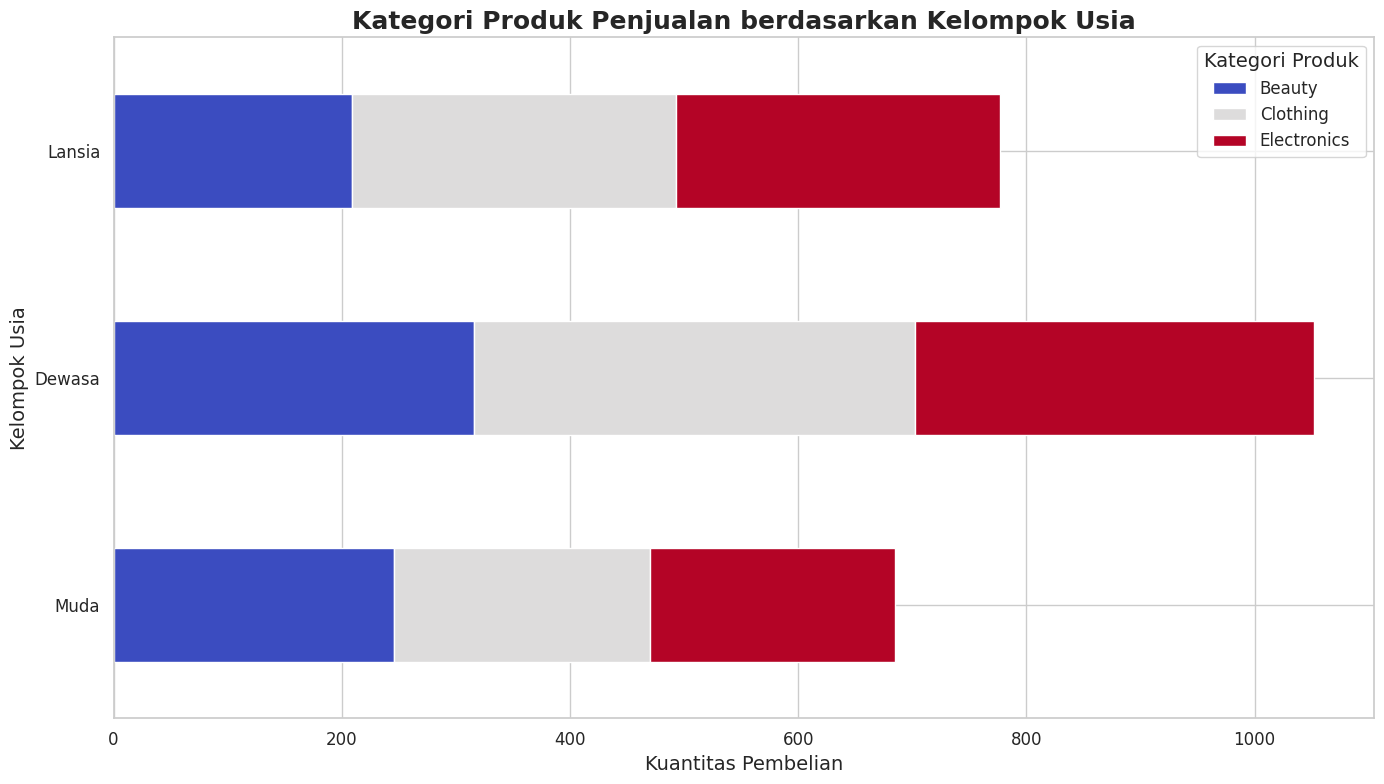

In [35]:
# Agregasi data berdasarkan grup usia dan kategori produk
stacked_data = df.groupby(['Age Group', 'Product Category'])['Quantity'].sum().unstack()

# Plot bagan horizontal stacked bar
stacked_data.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='coolwarm'
)


plt.title('Kategori Produk Penjualan berdasarkan Kelompok Usia', fontsize=18, fontweight='bold')
plt.xlabel('Kuantitas Pembelian', fontsize=14)
plt.ylabel('Kelompok Usia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Kategori Produk', title_fontsize=14, fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

## Penjelasan 📝
* Kelompok Dewasa merupakan penyumbang pembelian tertinggi secara keseluruhan, terutama pada kategori Clothing.

* Kelompok Lansia paling banyak membeli produk Electronics dibanding kategori lain.

* Kelompok Muda cenderung merata dalam pembelian, dengan sedikit dominasi pada kategori Beauty.

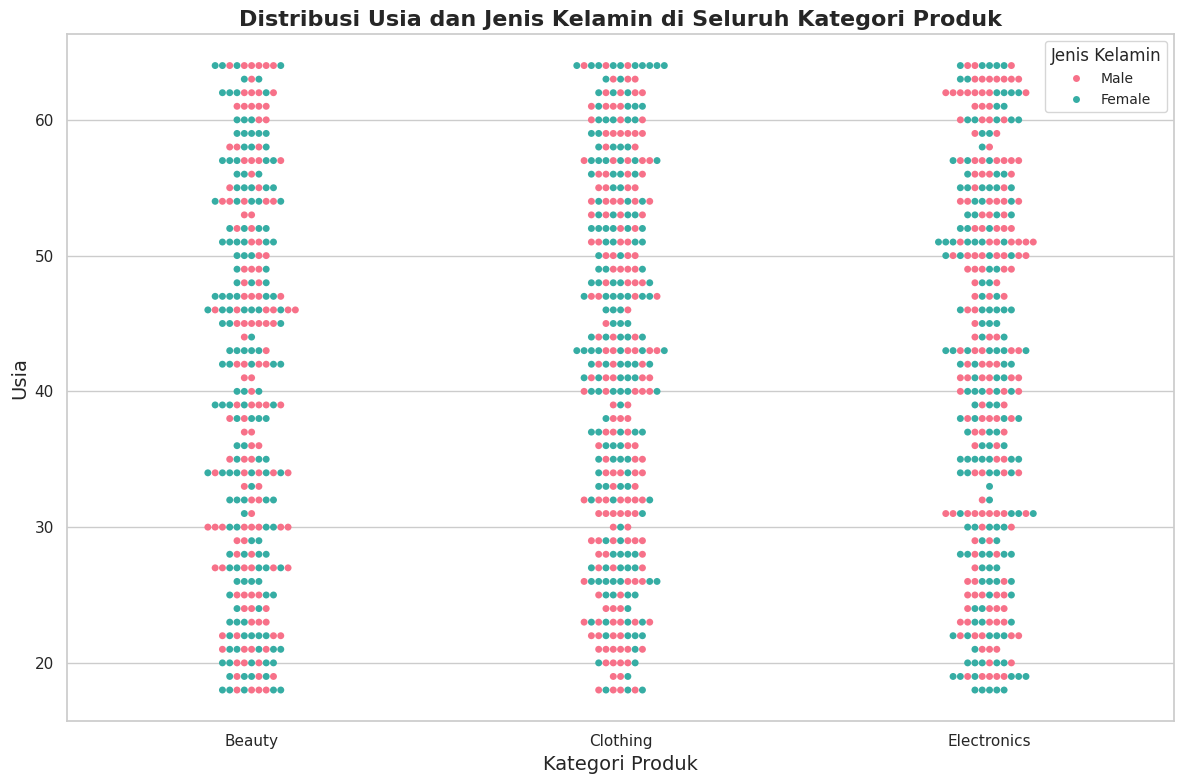

In [36]:
# Visualisasi distribusi usia dan jenis kelamin berdasarkan kategori produk
plt.figure(figsize=(12, 8))

# Buat swarmplot
sns.swarmplot(
    x='Product Category',
    y='Age',
    hue='Gender',
    data=df,
    palette='husl'
)


plt.title('Distribusi Usia dan Jenis Kelamin di Seluruh Kategori Produk', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Usia', fontsize=14)

plt.legend(
    title='Jenis Kelamin',
    loc='upper right',
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

## Penjelasan 📝
**Kesimpulan dari grafik distribusi usia dan jenis kelamin di seluruh kategori produk:**

* Ketiga kategori produk (Beauty, Clothing, dan Electronics) memiliki sebaran usia konsumen yang relatif merata antara usia 18 hingga 65 tahun.
* Tidak ada dominasi yang mencolok antara pria dan wanita dalam masing-masing kategori — distribusi gender tampak seimbang.
* Produk **Clothing** dan **Electronics** diminati oleh rentang usia yang lebih luas dibandingkan produk **Beauty**.
* Hal ini menunjukkan bahwa semua kelompok usia dan gender berkontribusi terhadap pembelian di tiap kategori produk, meskipun dengan sedikit variasi preferensi.


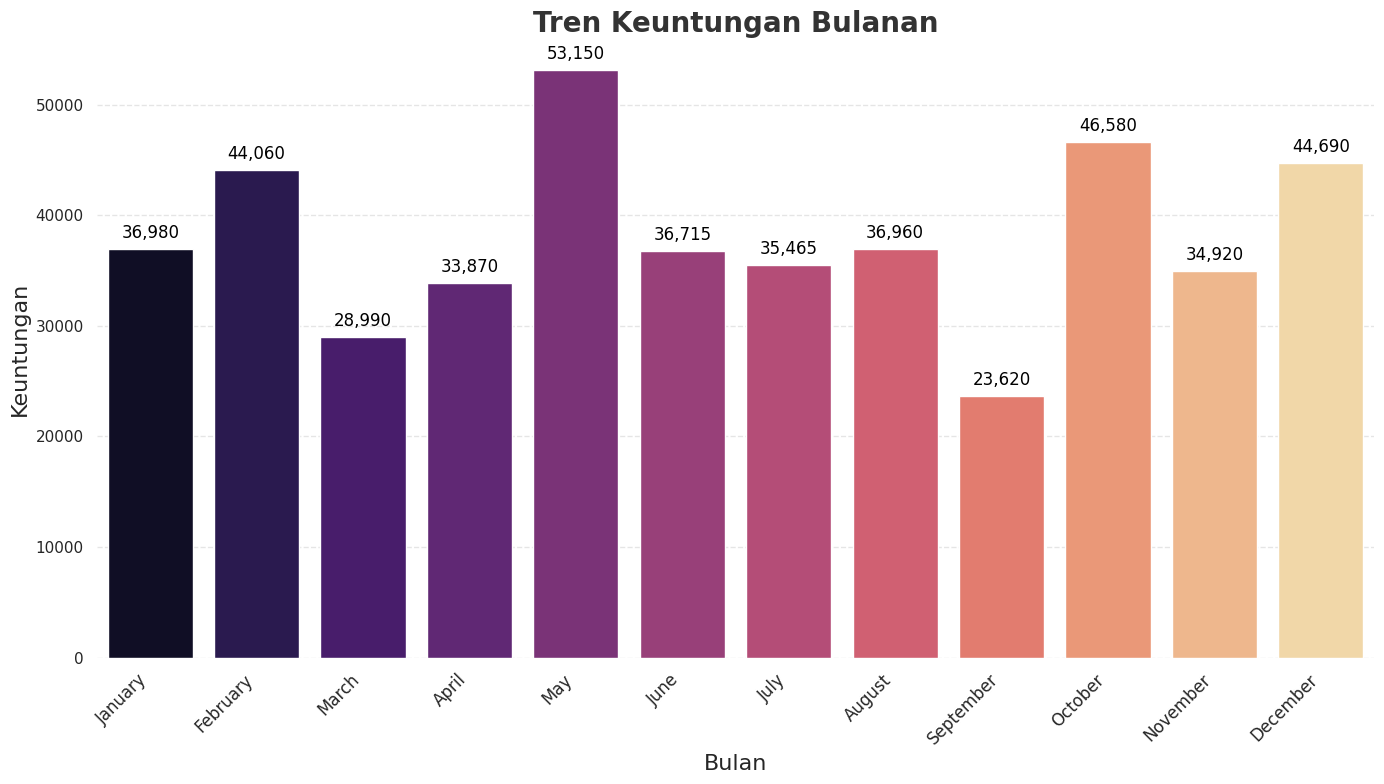

In [37]:
# Hitung total keuntungan bulanan
monthly_totals = df.groupby('Month')['Total Amount'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x='Month',
    y='Total Amount',
    data=monthly_totals,
    palette='magma'
)

plt.title('Tren Keuntungan Bulanan', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Keuntungan', fontsize=16)

for bar, total in zip(bars.patches, monthly_totals['Total Amount']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1000,
        f"{total:,.0f}",
        ha='center',
        fontsize=12,
        color='black'
    )

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Penjelasan 📝
Berdasarkan grafik keuntungan, keuntungan terbesar ada pada bulan Mei (53.15%), hal ini selaras dengan tingginya penjualan pada bulan Mei.

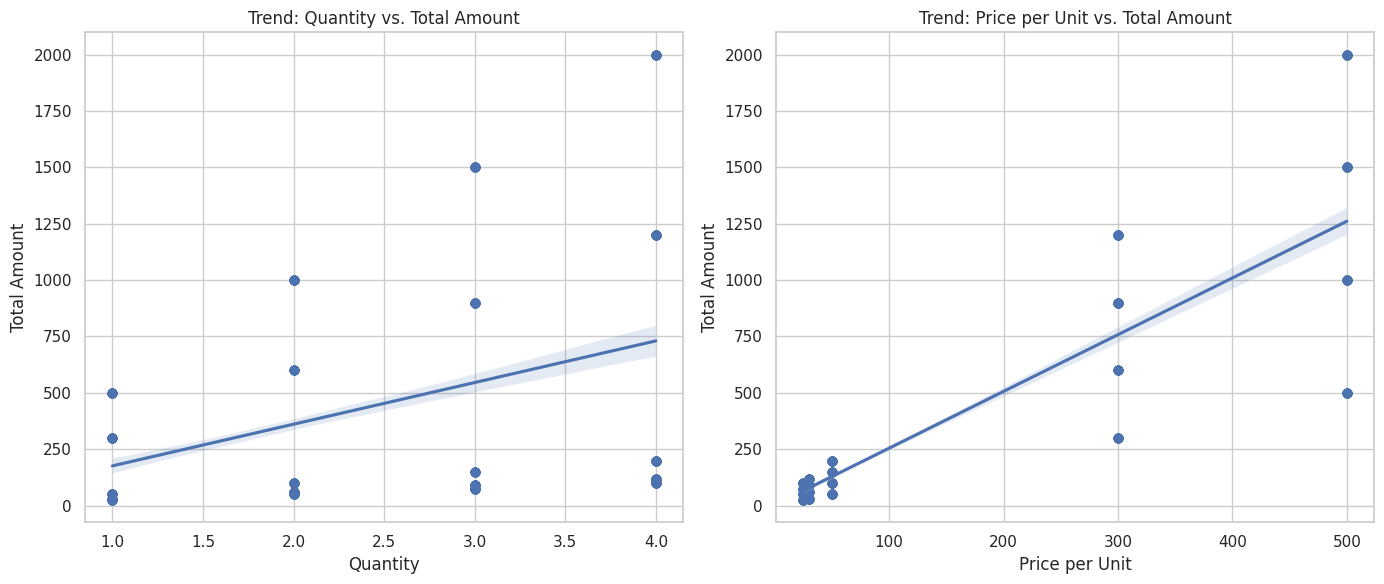

In [38]:
# Mengetahui trend dari variabel dengan `Total Amount`
# Membuat subplot untuk kuantitas dan harga per unit vs. Total Amount
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Quantity vs Total Amount
sns.regplot(data=df, x='Quantity', y='Total Amount', ax=axes[0])
axes[0].set_title('Trend: Quantity vs. Total Amount')

# Price per Unit vs Total Amount
sns.regplot(data=df, x='Price per Unit', y='Total Amount', ax=axes[1])
axes[1].set_title('Trend: Price per Unit vs. Total Amount')

plt.tight_layout()
plt.show()

## Penjelasan 📝
Berikut adalah **kesimpulan dari visualisasi**:

1. **Quantity vs. Total Amount:**
   Terdapat hubungan positif antara kuantitas barang yang dibeli dengan total jumlah pembayaran, tetapi hubungan ini tidak terlalu kuat. Ini mengindikasikan bahwa jumlah pembelian saja belum cukup untuk menjelaskan besar kecilnya total pembayaran.

2. **Price per Unit vs. Total Amount:**
   Terdapat korelasi yang lebih kuat antara harga satuan dan total pembayaran. Artinya, semakin tinggi harga per unit produk, semakin besar total pembayaran, menunjukkan bahwa **harga satuan lebih berpengaruh terhadap total transaksi dibandingkan kuantitas.**

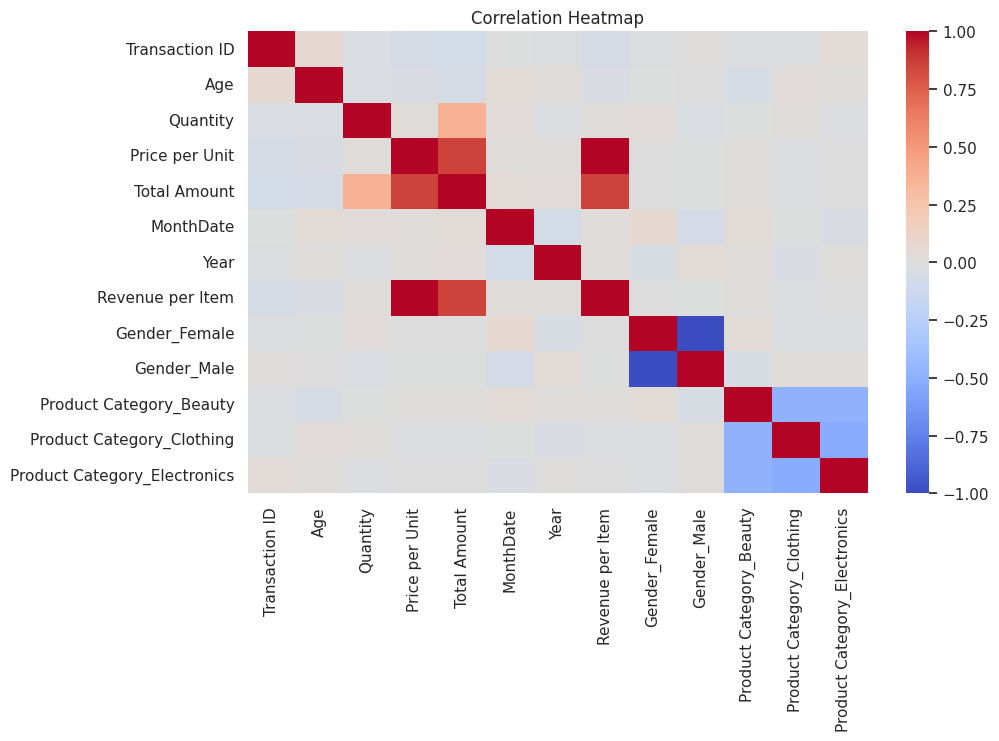

In [42]:
df_dummies = pd.get_dummies(data=df, columns=['Gender', 'Product Category'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_dummies.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

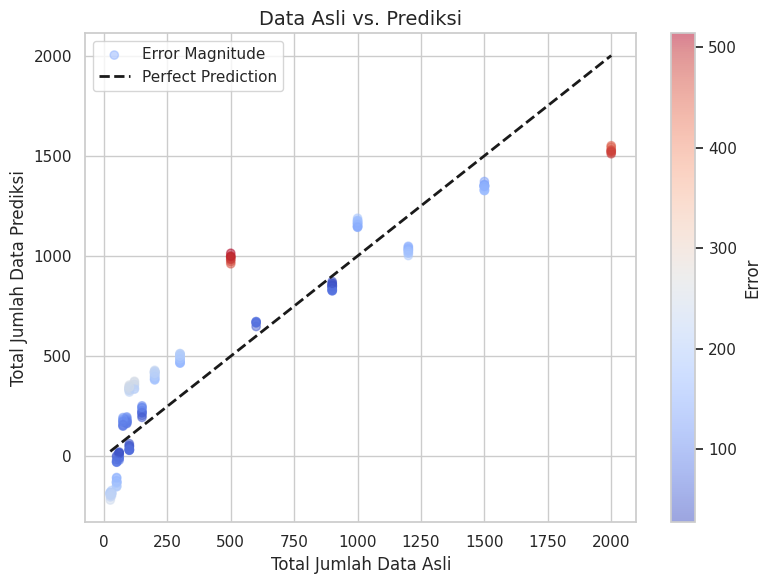

,Metric,Value
0,Mean Squared Error,41883.9920
1,Root Mean Squared Error,204.6558
2,R² Score,0.8569


In [43]:
# Mendefinisikan variabel bebas dan independen
y = df_dummies['Total Amount']
X = df_dummies[['Age', 'Quantity', 'Price per Unit',
                'Gender_Female', 'Gender_Male',
                'Product Category_Beauty',
                'Product Category_Clothing',
                'Product Category_Electronics']]

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Mendefinisikan dan membuat model Linear Rigression
model = LinearRegression()
model.fit(X_train, y_train)

#  Membuat prediksi
y_pred = model.predict(X_test)


# Membuat plot antara data asli dan data prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=abs(y_test - y_pred), cmap='coolwarm', alpha=0.5, label='Error Magnitude')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Data Asli vs. Prediksi', fontsize=14)
plt.xlabel('Total Jumlah Data Asli', fontsize=12)
plt.ylabel('Total Jumlah Data Prediksi', fontsize=12)
plt.legend()
plt.colorbar(label='Error')
plt.tight_layout()
plt.show()

from IPython.display import display

# ---  Evaluate Model Performance --- Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan performa model dalam bentuk tabel ( MSE, RMSE, R^2 Score)
performance_table = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'R² Score'],
    'Value': [mse, rmse, r2]
})

styled_performance_table = performance_table.style.set_caption("Model Performance Metrics") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]
    }]) \
    .format({'Value': '{:.4f}'})
display(styled_performance_table)

## Penjelasan 📝
Model prediktif yang digunakan memiliki akurasi yang baik dengan skor R² sebesar 0.8569. Hal ini menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas data asli. Meskipun begitu, masih ada beberapa titik dengan error yang cukup tinggi, yang perlu diwaspadai untuk peningkatan model ke depan (misalnya dengan outlier handling, feature engineering, atau tuning algoritma).

In [44]:
# Menentukan tanggal referensi untuk perhitungan terbaru
max_date = df['Date'].max()

# Menampilkan tanggal paling maksimal
print(f"Tanggal Referensi untuk Perhitungan Terbaru: {max_date}")

Tanggal Referensi untuk Perhitungan Terbaru: 2024-01-01 00:00:00


# RFM Customer Segmentation 💸

In [45]:
# Agregasi Data untuk Menghitung Metriks RFM pada level customer
customer_data = df.groupby('Customer ID').agg({
    'Date': lambda x: (max_date - x.max()).days,  # Recency
    'Transaction ID': 'count',  # Frequency
    'Total Amount': 'sum'  # Monetary
}).reset_index()

# Mengubah nama kolom untuk memperjelas
customer_data.rename(columns={
    'Date': 'Recency',
    'Transaction ID': 'Frequency',
    'Total Amount': 'Monetary'
}, inplace=True)

# Menampilkan Metriks RFM
print("Metriks RFM berhasil dihitung!")
customer_data.head()

Metriks RFM berhasil dihitung!


,Customer ID,Recency,Frequency,Monetary
0,CUST000,6,5,1055
1,CUST001,63,5,1395
2,CUST002,83,2,620
3,CUST003,31,3,710
4,CUST004,292,1,1000


In [46]:
# Menentukan kuantil untuk penilaian
quantiles = customer_data[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()

# Membentuk fungsi penilaian umum
def calculate_score(x, q1, q2, q3, ascending=True):
    """
    Calculate RFM scores based on quantiles.
    Parameters:
    - x: Value to be scored
    - q1, q2, q3: Quantiles (25th, 50th, 75th)
    - ascending: If True, lower values are better (e.g., Recency)
                 If False, higher values are better (e.g., Frequency, Monetary)
    """
    if ascending:
        if x <= q1:
            return 5
        elif x <= q2:
            return 4
        elif x <= q3:
            return 3
        else:
            return 2
    else:
        if x <= q1:
            return 2
        elif x <= q2:
            return 3
        elif x <= q3:
            return 4
        else:
            return 5

# Menetapkan skor RFM
customer_data['R_Score'] = customer_data['Recency'].apply(
    calculate_score, args=(quantiles['Recency'][0.25], quantiles['Recency'][0.5], quantiles['Recency'][0.75], True)
)
customer_data['F_Score'] = customer_data['Frequency'].apply(
    calculate_score, args=(quantiles['Frequency'][0.25], quantiles['Frequency'][0.5], quantiles['Frequency'][0.75], False)
)
customer_data['M_Score'] = customer_data['Monetary'].apply(
    calculate_score, args=(quantiles['Monetary'][0.25], quantiles['Monetary'][0.5], quantiles['Monetary'][0.75], False)
)

# Mengkombinasikan skor RFM ke dalam skor tunggal
customer_data['RFM_Score'] = customer_data['R_Score'].astype(str) + customer_data['F_Score'].astype(str) + customer_data['M_Score'].astype(str)

# Menampilkan skor RFM
print("Skor RFM berhasil ditetapkan!")
customer_data[['Customer ID', 'RFM_Score']].head()

Skor RFM berhasil ditetapkan!


,Customer ID,RFM_Score
0,CUST000,554
1,CUST001,454
2,CUST002,433
3,CUST003,543
4,CUST004,224


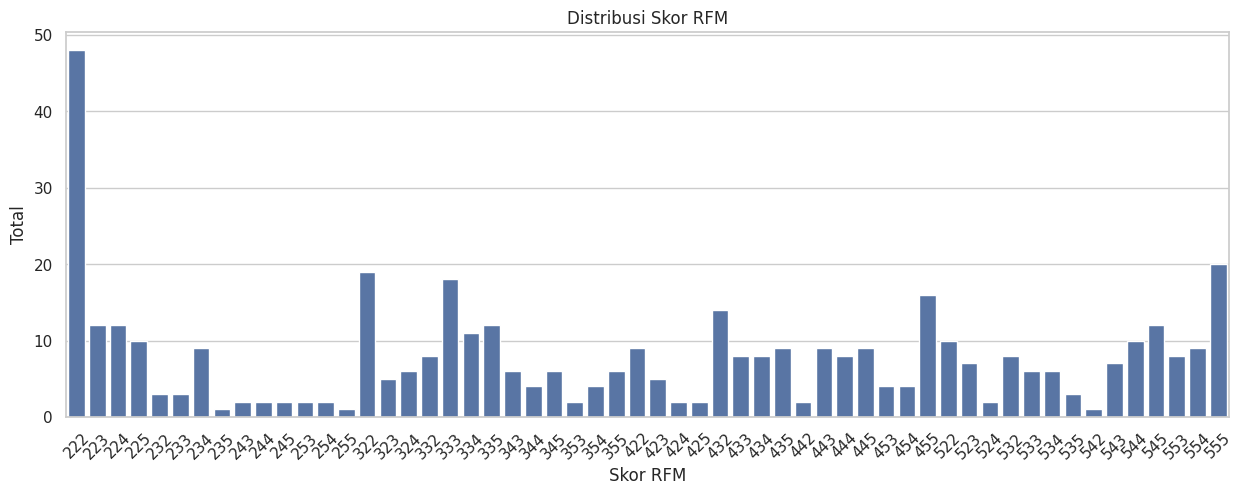

In [47]:
# Visualisasi distribusi skor RFM
plt.figure(figsize=(15, 5))
rfm_level_counts = customer_data['RFM_Score'].value_counts().sort_index()
sns.barplot(x=rfm_level_counts.index, y=rfm_level_counts.values)
plt.title('Distribusi Skor RFM')
plt.xlabel('Skor RFM')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

## Penjelasan 📝
Dari plot dapat dilihat bahwa skor RFM paling tinggi berada pada skor 222, ini menunjukkan mayoritas pelanggan berada di segmen pasif atau tidak aktif — mereka jarang bertransaksi dan tidak menghasilkan banyak nilai bagi bisnis.

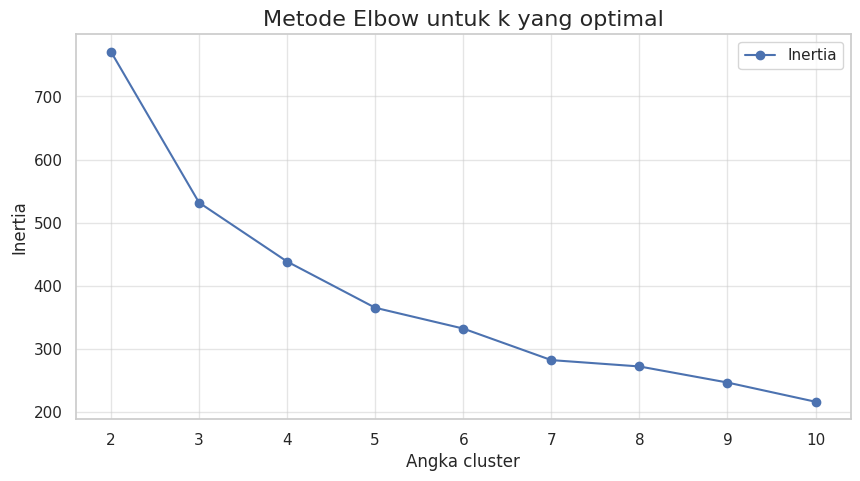

In [48]:
# Memastikan Skala RFM
# Memilih kolom RFM untuk clustering
rfm_data = customer_data[['Recency', 'Frequency', 'Monetary']]

# Skala untuk data RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Menentukan cluser yang optimal menggunakan metode Elbow
inertia = []
K = range(2, 11)  # Test for 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # Use scaled RFM data for clustering
    inertia.append(kmeans.inertia_)  # Append inertia (sum of squared distances)

# Plot Kurva Elbow
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.title('Metode Elbow untuk k yang optimal', fontsize=16)
plt.xlabel('Angka cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [49]:
# Memilih angka cluster yang paling optimal berdasarkan metode Elbow
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Menetapkan kluster ke pelanggan
customer_data['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled)

print("✔︎ K-Means clustering berhasil diterapkan!")

✔︎ K-Means clustering berhasil diterapkan!


In [63]:
# Ringkasan KMeans Clusters
cluster_summary = customer_data.groupby('Cluster_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print("\nRingkasan Cluster (KMeans):")
print(cluster_summary)


Ringkasan Cluster (KMeans):
   Cluster_KMeans     Recency  Frequency     Monetary
0               0  259.858333   1.291667   664.041667
1               1   59.548387   4.145161  2852.580645
2               2   72.112245   3.469388  1027.040816
3               3   81.850649   1.610390   641.590909


In [58]:
segment_mapping = {
    0: 'Hibernating',   # Example based on a potential cluster profile
    1: 'Champions',     # Example based on a potential cluster profile
    2: 'Loyal Customers', # Example based on a potential cluster profile
    3: 'At Risk'        # Example based on a potential cluster profile
}

# Create the 'Segment_KMeans' column using the mapping
customer_data['Segment_KMeans'] = customer_data['Cluster_KMeans'].map(segment_mapping)

# size of each segment
segment_size = customer_data['Segment_KMeans'].value_counts().reset_index()
segment_size.columns = ['Segment_KMeans','Count']
segment_size

,Segment_KMeans,Count
0,At Risk,154
1,Hibernating,120
2,Loyal Customers,98
3,Champions,62


In [56]:
# size of each segment
#segment_size = customer_data['Segment_KMeans'].value_counts().reset_index()
#segment_size.columns = ['Segment_KMeans','Count']
#segment_size

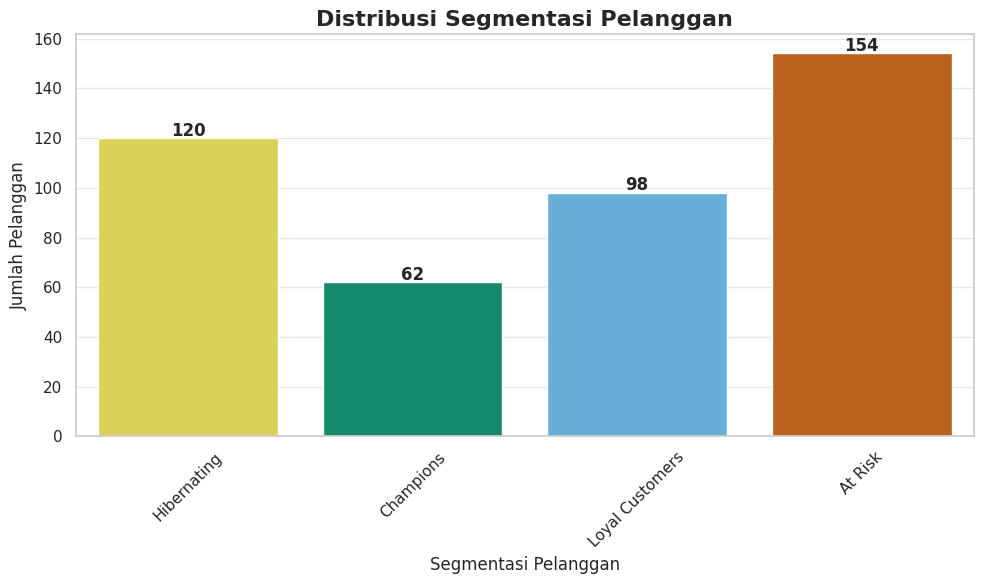

In [60]:
# Buat DataFrame jumlah pelanggan per segmen, isi 0 jika segmen tidak ada
segment_counts = customer_data['Segment_KMeans'].value_counts().reindex(
    ['Hibernating','Champions', 'Loyal Customers', 'At Risk'], fill_value=0
).reset_index()
segment_counts.columns = ['Segment', 'Count']

# Define a dictionary for segment colors
segment_colors = {
    'Champions': '#009E73',      # Green
    'Loyal Customers': '#56B4E9', # Light Blue
    'At Risk': '#D55E00',        # Orange
    'Hibernating': '#F0E442'     # Yellow
}

# Visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=segment_counts,
    x='Segment',
    y='Count',
    # Use the segment_colors dictionary to get colors based on the segment name
    palette=[segment_colors[s] for s in segment_counts['Segment']]
)

plt.title('Distribusi Segmentasi Pelanggan', fontsize=16, fontweight='bold')
plt.xlabel('Segmentasi Pelanggan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan teks label
for index, row in segment_counts.iterrows():
    plt.text(index, row['Count'] + 1, f"{row['Count']}", ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [62]:
# Menampilkan Dataset Final dengan Penugasan Cluster dalam Tabel

def highlight_segments(row):
    """Applies background color based on the Segment_KMeans value."""
    styles = [''] * len(row) # Initialize a list of empty strings for styles
    segment = row['Segment_KMeans']

    colors = {
        'Champions': '#98FB98',      # Pale Green
        'Loyal Customers': '#ADD8E6', # Light Blue
        'At Risk': '#FFB6C1',        # Light Coral
        'Hibernating': '#FFFFE0'     # Light Yellow
    }
    if segment in colors:
        styles = [f'background-color: {colors[segment]}'] * len(row)
    return styles

table = customer_data[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Cluster_KMeans', 'Segment_KMeans']].head(20)

styled_table = table.style.set_caption("Tabel Segmentasi Pelanggan") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#4B0082')]
    }]) \
    .apply(highlight_segments, axis=1)

display(styled_table)

print("\nTotal Segmentasi:")
display(segment_counts)

,Customer ID,Recency,Frequency,Monetary,Cluster_KMeans,Segment_KMeans
0,CUST000,6,5,1055,2,Loyal Customers
1,CUST001,63,5,1395,2,Loyal Customers
2,CUST002,83,2,620,3,At Risk
3,CUST003,31,3,710,2,Loyal Customers
4,CUST004,292,1,1000,0,Hibernating
5,CUST005,50,2,2150,3,At Risk
6,CUST008,163,2,150,3,At Risk
7,CUST009,22,4,1100,2,Loyal Customers
8,CUST010,252,2,1250,0,Hibernating
9,CUST011,35,4,2640,1,Champions



Total Segmentasi:


,Segment,Count
0,Hibernating,120
1,Champions,62
2,Loyal Customers,98
3,At Risk,154


## Rekomedasi
* **Kelompok Pelanggan `Champion` (62 pelanggan)**
1. Memberikan penghargaan atas loyalitas yang dilakukan baik bentuk voucher, fasilitas VIP, diskon khusus, maupun penawaran eksklusif.
2. Pertahankan keterlibatan pelanggan melalui email ucapan terimakasih maupun ucapan khusus dalam setiap perayaan mereka.

* **Kelompok Pelanggan `Loyal Customer` (98 pelanggan)**
1. Perkuat loyalitas pelanggan dengan adanya promo khusus, bonus belanja, maupun program berhadiah.
2. Jaga keterlibatan dengan membagikan informasi terkini tentang produk baru, diskon, maupun acara khusus anggota.

* **Kelompok Pelanggan `At Risk` (154 pelanggan)**
1. Atasi penurunan dengan adanya kampanye yang dipersonalisasi melalui email maupun sosial media pelanggan.
2. Berikan informasi terkait dengan produk baru serta diskon agar pelanggan dapat tertarik kembali untuk membeli produk.

* **Kelompok Pelanggan `Hibernating` (120 pelanggan)**
1. Bangkitkan kembali minat mereka dengan adanya promo besar-besaran, kampanye "Kami Merindukanmu", ataupun menawarkan paket musiman.
2. Lakukan survei untuk mengetahui alasan utama pemutusan hubungan dan gunakan umpan balik untuk meningkatkan layanan.
